In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import nbformat
import joblib
import base64
import io

In [35]:
cases_conf = pd.read_csv('dataset/confirmed_acc.csv')
pasien = pd.read_csv('dataset/patient.csv')
provinsi = pd.read_csv('dataset/province.csv',encoding = 'unicode_escape')

# **PREDIKSI KASUS COVID-19 YANG TELAH TERKONFIRMASI**

In [36]:
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [37]:
cases_conf.head()

,date,cases
0,1/22/2020,0
1,1/23/2020,0
2,1/24/2020,0
3,1/25/2020,0
4,1/26/2020,0


**KEMUNGKINAN KASUS COVID PERTAMAKALI TERJADI**

In [38]:
(cases_conf[cases_conf['cases'] == 0].sort_values(by=['date'], ascending=False)).head()

,date,cases
39,3/1/2020,0
18,2/9/2020,0
17,2/8/2020,0
16,2/7/2020,0
15,2/6/2020,0


**PENINGKATAN KASUS YANG TERJADI DARI AWAL MARET**




In [39]:
df = cases_conf.iloc[39:]
df['days']= df['date'].map(lambda x : (datetime.strptime(x, '%m/%d/%Y') - datetime.strptime("3/1/2020", '%m/%d/%Y')).days)
df[['date','days','cases']] #reorder column

<ipython-input-39-dc885c94eae1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,days,cases
39,3/1/2020,0,0
40,3/2/2020,1,2
41,3/3/2020,2,2
42,3/4/2020,3,2
43,3/5/2020,4,2
44,3/6/2020,5,4
45,3/7/2020,6,4
46,3/8/2020,7,6
47,3/9/2020,8,19
48,3/10/2020,9,27


**PREDIKSI KASUS UNTUK 60 HARI KEDEPAN**

In [40]:
def gompertz(a, c, t, t_0):
    Q = a * np.exp(-np.exp(-c*(t-t_0)))
    return Q

x = list(df['days'])
y = list(df['cases'])

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9, test_size=0.1, shuffle=False)
x_test_added = x_test + list(range((max(x_test)+1), 60))
popt, pcov = curve_fit(gompertz, x_train, y_train, method='trf', bounds=([100, 0, 0],[6*max(y_train),0.15, 70]))
a, estimated_c, estimated_t_0 = popt
y_pred = gompertz(a, estimated_c, x_train+x_test_added, estimated_t_0)

y_pred

<ipython-input-40-44b4586f50f0>:2: RuntimeWarning:

overflow encountered in exp



array([6.94453422e-03, 1.88295098e-02, 4.75043830e-02, 1.12095671e-01,
       2.48600952e-01, 5.20501753e-01, 1.03312552e+00, 1.95151092e+00,
       3.52071069e+00, 6.08657931e+00, 1.01143448e+01, 1.62018648e+01,
       2.50845667e+01, 3.76297134e+01, 5.48187449e+01, 7.77178331e+01,
       1.07438219e+02, 1.45089136e+02, 1.91726984e+02, 2.48304767e+02,
       3.15625683e+02, 3.94304201e+02, 4.84737062e+02, 5.87085640e+02,
       7.01270050e+02, 8.26974448e+02, 9.63662219e+02, 1.11059925e+03,
       1.26688317e+03, 1.43147639e+03, 1.60324086e+03, 1.78097279e+03,
       1.96343565e+03, 2.14939045e+03, 2.33762249e+03, 2.52696388e+03,
       2.71631192e+03, 2.90464320e+03, 3.09102366e+03, 3.27461503e+03,
       3.45467801e+03, 3.63057262e+03, 3.80175640e+03, 3.96778061e+03,
       4.12828520e+03, 4.28299265e+03, 4.43170126e+03, 4.57427802e+03,
       4.71065131e+03, 4.84080382e+03, 4.96476551e+03, 5.08260702e+03,
       5.19443348e+03, 5.30037872e+03, 5.40060007e+03, 5.49527359e+03,
      

**GAMBARAN PERBANDINGAN GRAFIK DATA HASIL DARI NILAI PREDIKSI DAN DATA YANG SEBENARNYA TERJADI**

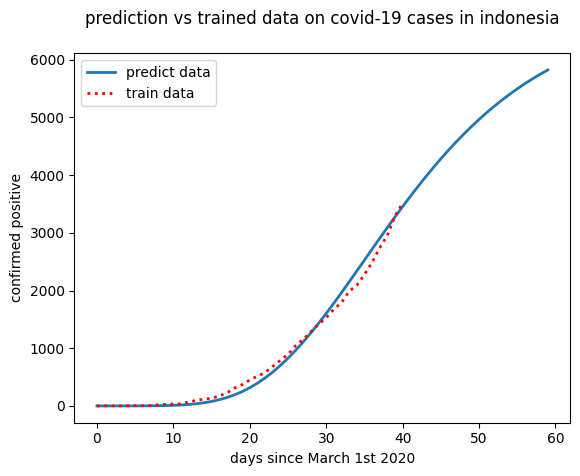

In [41]:
plt.plot(x_train+x_test_added, y_pred, linewidth=2, label='predict data')
plt.plot(x, y, linewidth=2, color='r', linestyle='dotted', label='train data')
# plt.plot(x_test, y_test, linewidth=2, color='g', linestyle='dotted', label='test data')
plt.title('prediction vs trained data on covid-19 cases in indonesia\n')
plt.xlabel('days since March 1st 2020')
plt.ylabel('confirmed positive')
plt.legend(loc='upper left')

**HASIL PREDIKSI COVID-19 60 HARI KEDEPANNYA**

In [42]:
prediksi = pd.DataFrame({'day_pred': x_test_added, 'cases_pred':np.around(y_pred[36:])})
prediksi

,day_pred,cases_pred
0,36,2716.0
1,37,2905.0
2,38,3091.0
3,39,3275.0
4,40,3455.0
5,41,3631.0
6,42,3802.0
7,43,3968.0
8,44,4128.0
9,45,4283.0


 **perbandingan akurasi antara model yang dilatih tanpa dan dengan persiapan data**

In [43]:
# Data preparation
X = pasien.drop(columns=['current_state', 'confirmed_date', 'released_date', 'deceased_date'])
y = pasien['current_state'].apply(lambda x: 1 if x == 'released' else 0)

# Tanpa Data Preparation
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X.select_dtypes(include='number'), y, test_size=0.2, random_state=42)
model_1 = RandomForestClassifier(random_state=42)
model_1.fit(X_train_1, y_train_1)
y_pred_1 = model_1.predict(X_test_1)
accuracy_1 = accuracy_score(y_test_1, y_pred_1)
print(f"Akurasi Tanpa data preparation: {accuracy_1}")

# Dengan Data Preparation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.select_dtypes(include='number'))
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model_2 = RandomForestClassifier(random_state=42)
model_2.fit(X_train_2, y_train_2)
y_pred_2 = model_2.predict(X_test_2)
accuracy_2 = accuracy_score(y_test_2, y_pred_2)
print(f"Akurasi Dengan data preparation: {accuracy_2}")

# Save the best model
best_model = model_2 if accuracy_2 > accuracy_1 else model_1
joblib.dump(best_model, 'best_model.pkl')

Akurasi Tanpa data preparation: 1.0
Akurasi Dengan data preparation: 1.0


['best_model.pkl']

# **DATA PASIEN**

In [44]:
pasien.head()

,patient_id,gender,age,nationality,province,current_state,contacted_with,confirmed_date,released_date,deceased_date,hospital
0,1,female,31.0,indonesia,DKI Jakarta,released,NaN,2-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
1,2,female,64.0,indonesia,DKI Jakarta,released,1.0,2-Mar-20,16-Mar-20,NaN,RSPI Sulianti Saroso
2,3,female,33.0,indonesia,DKI Jakarta,released,1.0,6-Mar-20,13-Mar-20,NaN,RSPI Sulianti Saroso
3,4,female,34.0,indonesia,DKI Jakarta,isolated,1.0,6-Mar-20,NaN,NaN,RSPI Sulianti Saroso
4,5,male,55.0,indonesia,DKI Jakarta,isolated,1.0,8-Mar-20,NaN,NaN,RS Persahabatan


**MELIHAT INFORMASI DARI DATA SET**

In [45]:
pasien.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   patient_id      893 non-null    int64  
 1   gender          156 non-null    object 
 2   age             156 non-null    float64
 3   nationality     156 non-null    object 
 4   province        156 non-null    object 
 5   current_state   166 non-null    object 
 6   contacted_with  27 non-null     float64
 7   confirmed_date  893 non-null    object 
 8   released_date   5 non-null      object 
 9   deceased_date   4 non-null      object 
 10  hospital        17 non-null     object 
dtypes: float64(2), int64(1), object(8)
memory usage: 76.9+ KB


**MENGHITUNG DATA PASIEN YANG DI ISOLASI, MENINGGAL DAN JUGA SEHAT**

In [46]:
pasien['current_state'].value_counts()

,count
current_state,
isolated,143
deceased,15
released,8


**GRAFIK DATA PASIEN**

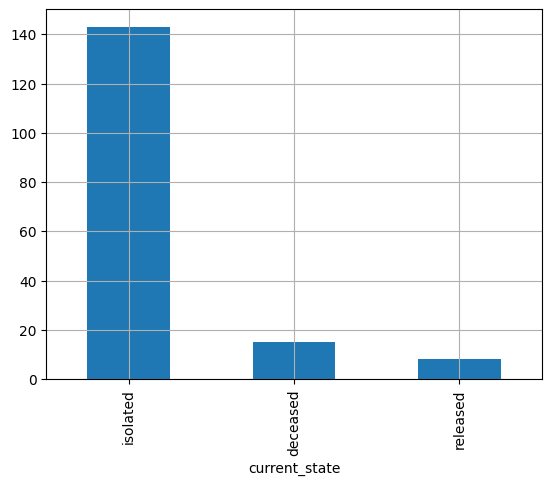

In [47]:
pasien.current_state.value_counts().plot.bar().grid()

**MENGHITUNG RATA-RATA USIA BERDASARKAN GENDER DARI PASIEN**

In [48]:
male = pasien.loc[pasien['gender']=='male','age'].mean()
female = pasien.loc[pasien['gender']=='female','age'].mean()
print('Distribusi rata-rata umur pasien laki-laki: %i' %male, 'tahun')
print('Distribusi rata-rata umur pasien perempuan: %i' %female, 'tahun')

Distribusi rata-rata umur pasien laki-laki: 48 tahun
Distribusi rata-rata umur pasien perempuan: 47 tahun


**GRAFIK KASUS TERJANGKIT BERDASARKAN GENDER**

<Axes: xlabel='gender', ylabel='count'>

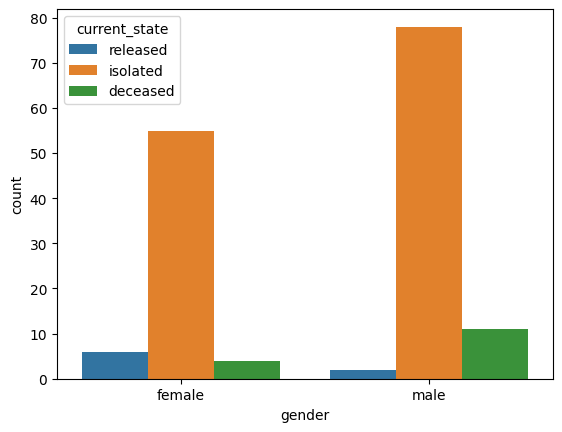

In [49]:
sns.countplot(x='gender', hue='current_state', data=pasien)

**GRAFIK DAERAH YANG MENYUMBANG KASUS TERBANYAK**

<Axes: xlabel='province'>

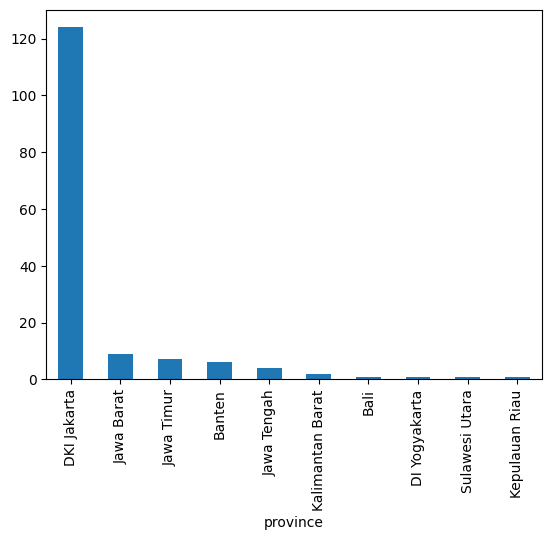

In [50]:
pasien.province.value_counts().plot.bar()

**GRAFIK PASIEN YANG POSITIF BERDASARKAN TANGGAL TERKONFIRMASINYA**

<Axes: xlabel='confirmed_date'>

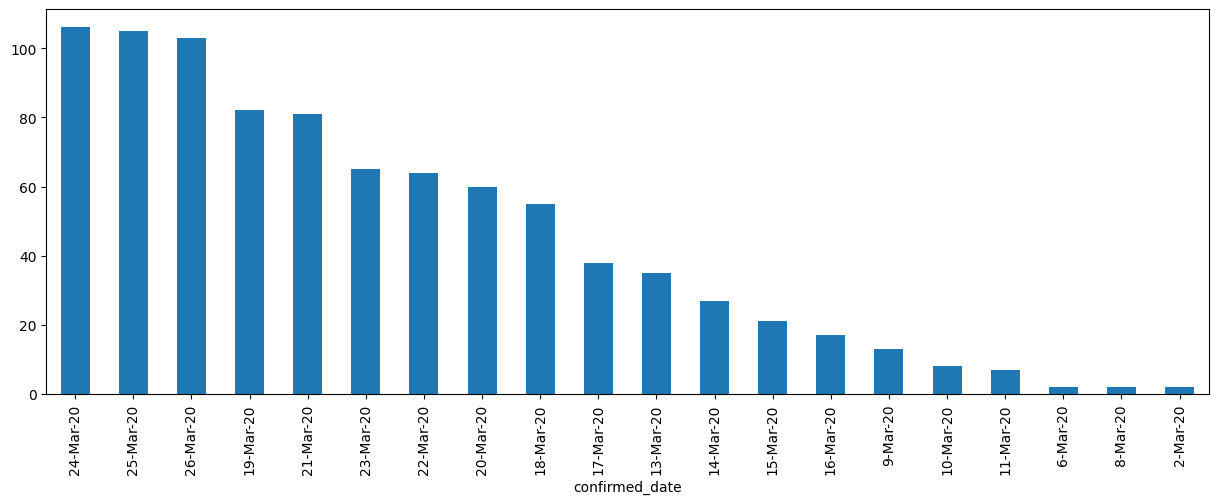

In [51]:
plt.figure(figsize=(15,5))
pasien.confirmed_date.value_counts().plot.bar()

# **DATA PROVINSI**

In [52]:
provinsi.head(5)

,province_id,province_name,island,iso_code,capital_city,population,population_kmsquare,confirmed,deceased,released,longitude,latitude
0,1,Aceh,Sumatra,AC,Banda Aceh,4906835,86,4,0,0,9.672.895,3.869.994
1,2,Bali,Kepulauan Nusa Tenggara,BA,Denpasar,4104900,738,9,2,0,11.512.255,-825.731
2,3,Banten,Jawa,BT,Serang,11704877,1298,84,4,1,106.160.889,-6.315.299
3,4,Bengkulu,Sumatra,BE,Bengkulu,1844800,93,0,0,0,102.315.674,-3.414.725
4,5,DI Yogyakarta,Jawa,YO,Yogyakarta,3553100,1134,22,2,1,110.390.625,-7.863.382


**MELIHAT INFORMASI DARI DATA SET**

In [53]:
print("Total Data : ", provinsi.shape,"\n")
provinsi.info()

Total Data :  (35, 12) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   province_id          35 non-null     int64 
 1   province_name        35 non-null     object
 2   island               35 non-null     object
 3   iso_code             35 non-null     object
 4   capital_city         35 non-null     object
 5   population           35 non-null     int64 
 6   population_kmsquare  35 non-null     int64 
 7   confirmed            35 non-null     int64 
 8   deceased             35 non-null     int64 
 9   released             35 non-null     int64 
 10  longitude            35 non-null     object
 11  latitude             35 non-null     object
dtypes: int64(6), object(6)
memory usage: 3.4+ KB


**BANYAKNYA KASUS BERDASARKAN PULAU**

In [54]:
provinsi['island'].value_counts()

,count
island,
Sumatra,10
Jawa,6
Sulawesi,6
Kalimantan,5
Kepulauan Nusa Tenggara,3
Kepulauan Maluku,2
Papua,2
Unknown,1


**METHOD YANG DI GUNAKAN UNTUK MENGHITUNG BANYAKNYA JUMLAH KORBAN YANG TELAH TERKONFIRMASI**

In [55]:
#----------Group By---------------
def FungsiGroup(column, ds):
  dataset = ds
  print((dataset.groupby(column).sum()[['confirmed']]).sort_values(by=column, ascending=False))

**BANYAKNYA PASIEN BERDASARKAN PENGELOMPOKAN KOLOM ISLAND**

In [56]:
FungsiGroup('island', provinsi)

                         confirmed
island                            
Unknown                         20
Sumatra                         29
Sulawesi                        35
Papua                            7
Kepulauan Nusa Tenggara         11
Kepulauan Maluku                 2
Kalimantan                      22
Jawa                           911


In [57]:
df =  pd.DataFrame((provinsi.groupby('island').sum()[['confirmed']]).sort_values(by='island', ascending=False))
df.head()

,confirmed
island,
Unknown,20
Sumatra,29
Sulawesi,35
Papua,7
Kepulauan Nusa Tenggara,11


**MENGUBAH DAN MENGHAPUS INDEKS DARI KOLOM ISLAND DAN SIMPAN PADA KOLOM ISLAND BARU**

In [58]:
df['island']=df.index
df.reset_index(drop=True, inplace=True)

In [59]:
df = df[['island', 'confirmed']]
df.head()

,island,confirmed
0,Unknown,20
1,Sumatra,29
2,Sulawesi,35
3,Papua,7
4,Kepulauan Nusa Tenggara,11


**GRAFIK BULAT UNTUK MENAMPILKAN PASIEN YANG TERKONFIRMASI BERDASARKAN KOLOM ISLAND**

In [60]:
import plotly.express as px
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


fig = px.pie(
    values=df['confirmed'],
    names=df['island'],
    color_discrete_sequence=px.colors.qualitative.Set3
)

fig.update_layout(font=dict(size=15, color="#242323"))
py.iplot(fig)

In [62]:
!wget -q -O - ipv4.icanhazip.com

34.106.77.68


In [63]:
! streamlit run covid.py & npx localtunnel --port 8501



⠙⠹⠸⠼
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.106.77.68:8501

⠴⠦⠧⠇⠏⠋⠙⠹⠸your url is: https://fifty-llamas-shout.loca.lt
/content/covid.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_case_dates["date"] = first_case_dates["date"].dt.strftime('%d/%m/%Y')  # Format tanggal
/content/covid.py:22: RuntimeWarning:

overflow encountered in exp

  Stopping...
^C
